# **ADNI PREPROCESSING PIPELINE BY HRITHIK, MANAN, ABHINAV**

**INSTALLING REQUIRED LIBRARIES**

In [ ]:
pip install graphviz networkx pygsp pydicom nilearn nitime spektral --quiet

     |████████████████████████████████| 1.8 MB 5.3 MB/s 
     |████████████████████████████████| 2.0 MB 50.3 MB/s 
     |████████████████████████████████| 9.6 MB 30.1 MB/s 
     |████████████████████████████████| 6.2 MB 26.5 MB/s 
     |████████████████████████████████| 129 kB 60.2 MB/s 
     |████████████████████████████████| 38.1 MB 60.0 MB/s 
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
albumentations 0.1.12 requires imgaug<0.2.7,>=0.2.5, but you have imgaug 0.2.9 which is incompatible.


**IMPORTING REQUIRED LIBRARIES**

In [ ]:
from PIL import Image
import numpy as np
import cv2
from skimage.util import random_noise
from google.colab.patches import cv2_imshow
import pygsp 
import networkx as nx
import graphviz
import scipy
from scipy.sparse import coo_matrix, csc_matrix
from sklearn.feature_extraction import image
from scipy import signal, sparse
import matplotlib.pyplot as plt
from pygsp import graphs, filters, plotting
import math
from scipy.stats import pearsonr
from sklearn import metrics
import pydicom as dicom
import matplotlib.pyplot as plt
from itertools import cycle
from sklearn.cluster import AffinityPropagation
from scipy import ndimage
from skimage import morphology
import pydicom
import numpy
import os
import math
import pylab
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from glob import glob
from scipy import ndimage
from skimage import morphology
import nilearn
import nitime
from nilearn.plotting import view_img, plot_glass_brain, plot_anat, plot_epi
from nilearn import plotting
from nilearn.image import mean_img, index_img
import nibabel as nib
import ipywidgets as widgets
from nilearn import datasets
import spektral
import pickle
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

**MOUNTING GOOGLE DRIVE FOR DATA**

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


**GETTING LIST OF ALL THE IMAGES FROM GOOGLE DRIVE**

In [ ]:
path = "/content/drive/MyDrive/S166728"
dir_list = os.listdir(path)
string = "/content/drive/MyDrive/S166728/"
new_list = [string + x for x in dir_list]

In [ ]:
nii_img1 = '/content/drive/MyDrive/S166728/ADNI_136_S_0107_MR_Resting_State_fMRI_br_raw_20120910171550239_87_S166728_I332647.nii'

**DEFINING AFFINE MATRIX**

In [ ]:
new_affine=np.array([[1,0,0,0],[0,1,0,0],[0,0,1,0],[0,0,0,1]])
print(new_affine.shape)
print(type(new_affine))
n_clusters_ = 35

(4, 4)
<class 'numpy.ndarray'>


## **PARCELLATION SCHEME**

**WARDX PARCELLATION SCHEME**

In [ ]:
from nilearn.regions import Parcellations
wardx = Parcellations(method='ward', n_parcels=90, memory='nilearn_cache' ,target_shape=[12,12,9],target_affine=new_affine) 
i1 = wardx.fit(nii_img1)
print('Parcellation successful')

[MultiNiftiMasker.fit] Loading data from [/content/drive/MyDrive/S166728/ADNI_136_S_0107_MR_Resting_State_fMRI_br_raw_20120910171550239_87_S166728_I332647.nii]
[MultiNiftiMasker.fit] Computing mask


/usr/local/lib/python3.7/dist-packages/nilearn/_utils/cache_mixin.py:304: UserWarning: memory_level is currently set to 0 but a Memory object has been provided. Setting memory_level to 1.
  warnings.warn("memory_level is currently set to 0 but "


[MultiNiftiMasker.transform] Resampling mask
[Parcellations] Loading data
[MultiNiftiMasker.transform_single_imgs] Loading data from Nifti1Image('/content/drive/MyDrive/S166728/ADNI_136_S_0107_MR_Resting_State_fMRI_br_raw_20120910171550239_87_S166728_I332647.nii')
[MultiNiftiMasker.transform_single_imgs] Resampling images
[MultiNiftiMasker.transform_single_imgs] Smoothing images
[MultiNiftiMasker.transform_single_imgs] Extracting region signals
[MultiNiftiMasker.transform_single_imgs] Cleaning extracted signals


/usr/local/lib/python3.7/dist-packages/nilearn/_utils/cache_mixin.py:304: UserWarning: memory_level is currently set to 0 but a Memory object has been provided. Setting memory_level to 1.
  warnings.warn("memory_level is currently set to 0 but "


[Parcellations] computing ward
________________________________________________________________________________
[Memory] Calling nilearn.regions.parcellations._estimator_fit...
_estimator_fit(array([[1., ..., 0.]], dtype=float32), AgglomerativeClustering(connectivity=<320x320 sparse matrix of type '<class 'numpy.int64'>'
	with 1952 stored elements in COOrdinate format>,
                        memory=Memory(location=nilearn_cache/joblib),
                        n_clusters=90))
________________________________________________________________________________
[Memory] Calling sklearn.cluster._agglomerative.ward_tree...
ward_tree(array([[1.],
       ...,
       [0.]], dtype=float32), connectivity=<320x320 sparse matrix of type '<class 'numpy.int64'>'
	with 1952 stored elements in COOrdinate format>, n_clusters=None, return_distance=False)
________________________________________________________ward_tree - 0.0s, 0.0min
____________________________________________________estimator_fit - 0.0

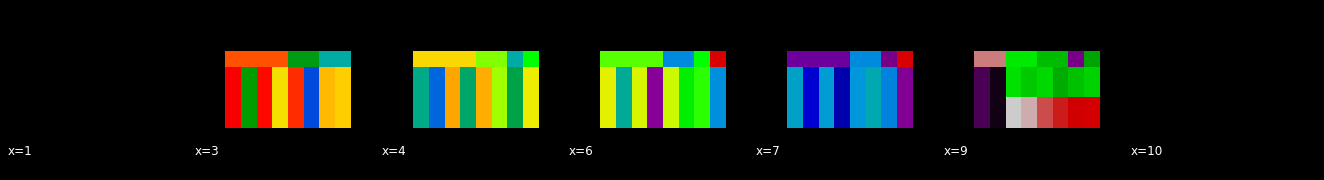

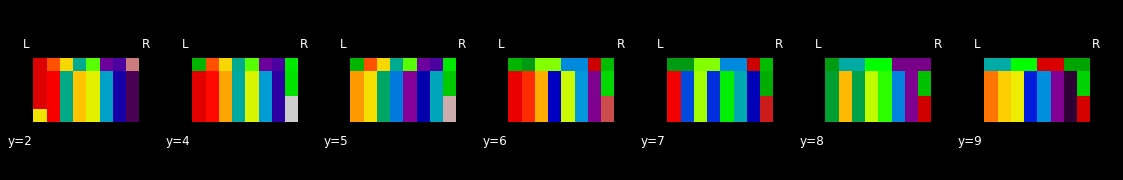

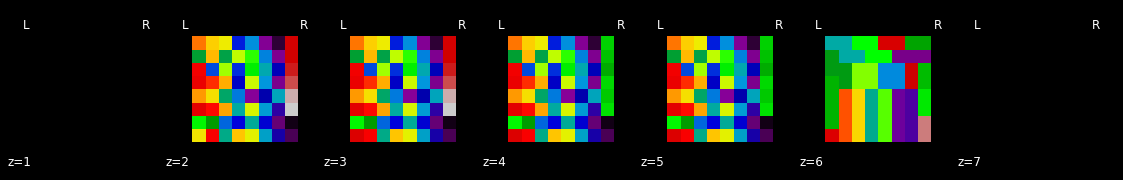

In [ ]:
plotting.plot_epi(i1.labels_img_, draw_cross=False, display_mode='x')   
plotting.plot_epi(i1.labels_img_, draw_cross=False, display_mode='y')
plotting.plot_epi(i1.labels_img_, draw_cross=False, display_mode='z')

In [ ]:
i1 = wardx.fit(new_list)
print('Parcellation successful')

[MultiNiftiMasker.fit] Loading data from [/content/drive/MyDrive/S166728/ADNI_136_S_0107_MR_Resting_State_fMRI_br_raw_20120910171020279_6281_S166728_I332647.nii,
 /content/drive/MyDrive/S166728/ADNI_136_S_0107_MR_Resting_State_fMRI_br_raw_20120910171550239_87_S166728_I332647.nii,
 /content/drive/MyDrive/S166728/ADNI_136_S_0107_MR_Resting_State_fMRI_br_raw_20120910171521480_6343_S166728_I332647.nii,
 /content/drive/MyDrive/S166728/ADNI_136_S_0107_MR_Resting_State_fMRI_br_raw_20120910171645046_1206_S166728_I332647.nii,
 /content/drive/MyDrive/S166728/ADNI_136_S_0107_MR_Resting_State_fMRI_br_raw_20120910171554370_3931_S166728_I332647.nii,
 /content/drive/MyDrive/S166728/ADNI_136_S_0107_MR_Resting_State_fMRI_br_raw_20120910170317768_3772_S166728_I332647.nii,
 /content/drive/MyDrive/S166728/ADNI_136_S_0107_MR_Resting_State_fMRI_br_raw_20120910170600858_3756_S166728_I332647.nii,
 /content/drive/MyDrive/S166728/ADNI_136_S_0107_MR_Resting_State_fMRI_br_raw_20120910170611287_862_S166728_I332647

/usr/local/lib/python3.7/dist-packages/nilearn/_utils/cache_mixin.py:304: UserWarning: memory_level is currently set to 0 but a Memory object has been provided. Setting memory_level to 1.
  warnings.warn("memory_level is currently set to 0 but "


_____________________________________________________compute_mean - 1.2s, 0.0min
________________________________________________________________________________
[Memory] Calling nilearn.image.image._compute_mean...
_compute_mean('/content/drive/MyDrive/S166728/ADNI_136_S_0107_MR_Resting_State_fMRI_br_raw_20120910171521480_6343_S166728_I332647.nii', target_affine=array([[1, 0, 0, 0],
       [0, 1, 0, 0],
       [0, 0, 1, 0],
       [0, 0, 0, 1]]), target_shape=[12, 12, 9], smooth=1)
_____________________________________________________compute_mean - 0.3s, 0.0min
________________________________________________________________________________
[Memory] Calling nilearn.image.image._compute_mean...
_compute_mean('/content/drive/MyDrive/S166728/ADNI_136_S_0107_MR_Resting_State_fMRI_br_raw_20120910171645046_1206_S166728_I332647.nii', target_affine=array([[1, 0, 0, 0],
       [0, 1, 0, 0],
       [0, 0, 1, 0],
       [0, 0, 0, 1]]), target_shape=[12, 12, 9], smooth=1)
________________________

In [ ]:
i1.connectivity_

<320x320 sparse matrix of type '<class 'numpy.int64'>'
	with 1952 stored elements in COOrdinate format>

In [ ]:
i1.n_components

200

In [ ]:
conn = i1.connectivity_
type(conn)


scipy.sparse.coo.coo_matrix

(320, 320)


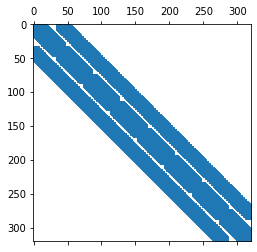

In [ ]:
print(conn.shape)
plt.spy(conn)

In [ ]:
W = conn
D_ward = np.zeros(W.shape)

In [ ]:
W_ward = W.toarray()
print(W.shape)
print(D_ward.shape)
print(type(W))
print(type(D_ward))

(320, 320)
(320, 320)
<class 'scipy.sparse.coo.coo_matrix'>
<class 'numpy.ndarray'>


In [ ]:
with open('par_wardx.pkl', 'wb') as f:
  pickle.dump(i1, f)

**SPECTRAL PARCELLATION SCHEME**

## **GRAPH FOURIER TRANSFORM**

**LAPLACE TRANSFORM**

In [ ]:
for i in range(W_ward.shape[0]):
  for j in range(W_ward.shape[0]):

    D_ward[i][i] += W_ward[i][j]

L_ward = D_ward - W_ward

**CLUSTERING APPROACH**

In [ ]:
af = AffinityPropagation(random_state=5).fit(W_ward)
cluster_centers_indices = af.cluster_centers_indices_
labels = af.labels_
print("Estimated number of clusters: %d" % n_clusters_)

Estimated number of clusters: 35


**APPLYING HIGH PASS FILTER**

In [ ]:

b_W = cv2.GaussianBlur(L_ward, (11, 11), 0)

In [ ]:

g_hpf_ward = L_ward - b_W

**APPLYING DIMESIONALITY REDUCTION**

In [ ]:
scalar = StandardScaler()
scalar.fit(W_ward)
scaled_data = scalar.transform(W_ward)
pca = PCA(n_components = 2)
pca.fit(scaled_data)
x_pca_ward = pca.transform(scaled_data)
# x_pca.shape

In [ ]:
with open('HCP_w.h5', 'wb') as f:
  pickle.dump(x_pca_ward, f)

In [ ]:
with open('FC_w.npy', 'wb') as f:
  pickle.dump(W_ward, f)